<a href="https://colab.research.google.com/github/DattaIn/idatta.github.io/blob/master/Flower_image_classification_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import numpy as np
import os
import PIL
import PIL.Image
import tensorflow as tf
import tensorflow_datasets as tfds

In [13]:

print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.15.0


Download Keras DataSet

In [2]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

11490434/11490434 [==============================] - 0s 0us/step


Sequential Model

In [3]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10)
])

In [4]:
predictions = model(x_train[:1]).numpy()
predictions

array([[ 0.05296044,  0.13437839, -0.6888196 ,  0.6310554 , -0.12783253,
        -0.2691697 ,  0.32992315, -0.34345073, -0.4746736 ,  0.27208042]],
      dtype=float32)

In [5]:
tf.nn.softmax(predictions).numpy()

array([[0.10277737, 0.11149537, 0.0489493 , 0.18321496, 0.08577882,
        0.07447288, 0.13557538, 0.06914142, 0.06063857, 0.12795582]],
      dtype=float32)

In [6]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [7]:
model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

In [8]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2898 - accuracy: 0.9154
Epoch 2/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1427 - accuracy: 0.9576
Epoch 3/5
1875/1875 [==============================] - 10s 6ms/step - loss: 0.1066 - accuracy: 0.9676
Epoch 4/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0847 - accuracy: 0.9738
Epoch 5/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0751 - accuracy: 0.9761


In [9]:
model.evaluate(x_test,  y_test, verbose=2)

313/313 - 2s - loss: 0.0714 - accuracy: 0.9764 - 2s/epoch - 6ms/step


[0.07143957167863846, 0.9764000177383423]

In [10]:
probability_model = tf.keras.Sequential([
  model,
  tf.keras.layers.Softmax()
])

In [11]:
probability_model(x_test[:5])

<tf.Tensor: shape=(5, 10), dtype=float32, numpy=
array([[8.6355925e-08, 1.5784762e-08, 2.5927651e-05, 3.6120982e-05,
        1.2040324e-10, 8.5205363e-09, 4.6600842e-14, 9.9992478e-01,
        4.1390638e-07, 1.2755667e-05],
       [1.1112935e-09, 4.8340484e-05, 9.9994791e-01, 2.7156136e-06,
        2.3321689e-16, 4.3089997e-08, 1.3502995e-08, 2.0396884e-14,
        9.0132676e-07, 6.8709652e-15],
       [1.1202218e-06, 9.9603158e-01, 7.3925871e-04, 1.1972251e-04,
        4.6255493e-05, 9.1641496e-06, 2.3521603e-05, 1.8023790e-03,
        1.2215015e-03, 5.5663900e-06],
       [9.9993038e-01, 6.3844382e-08, 1.7795408e-05, 3.3296996e-07,
        3.2809234e-07, 1.5306499e-06, 4.1554184e-05, 6.3024436e-06,
        5.3543033e-07, 1.1928639e-06],
       [7.8043814e-07, 2.9615563e-09, 2.4868734e-06, 2.5273538e-08,
        9.9352598e-01, 3.5901439e-07, 4.5580458e-07, 4.0950676e-05,
        2.1750593e-06, 6.4267390e-03]], dtype=float32)>

Download a dataset of several thousand photos of flowers. The flowers dataset contains five sub-directories, one per class:
flowers_photos/
  daisy/
  dandelion/
  roses/
  sunflowers/
  tulips/

In [14]:
import pathlib
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
archive = tf.keras.utils.get_file(origin=dataset_url, extract=True)
data_dir = pathlib.Path(archive).with_suffix('')

228813984/228813984 [==============================] - 2s 0us/step


In [15]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


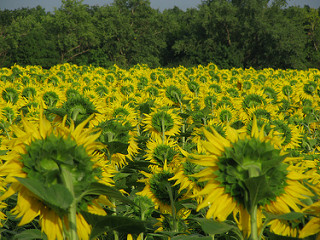

In [18]:
sunflowers = list(data_dir.glob('sunflowers/*'))
PIL.Image.open(str(sunflowers[0]))

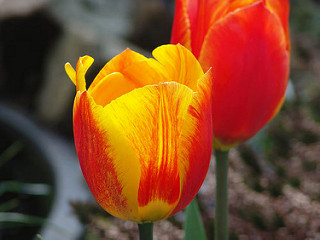

In [19]:
tulips = list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[0]))

Dataset

In [30]:
batch_size = 32
img_height = 180
img_width = 180
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)


class_names = train_ds.class_names
print('classes: ', class_names)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.
Found 3670 files belonging to 5 classes.
Using 734 files for validation.
classes:  ['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


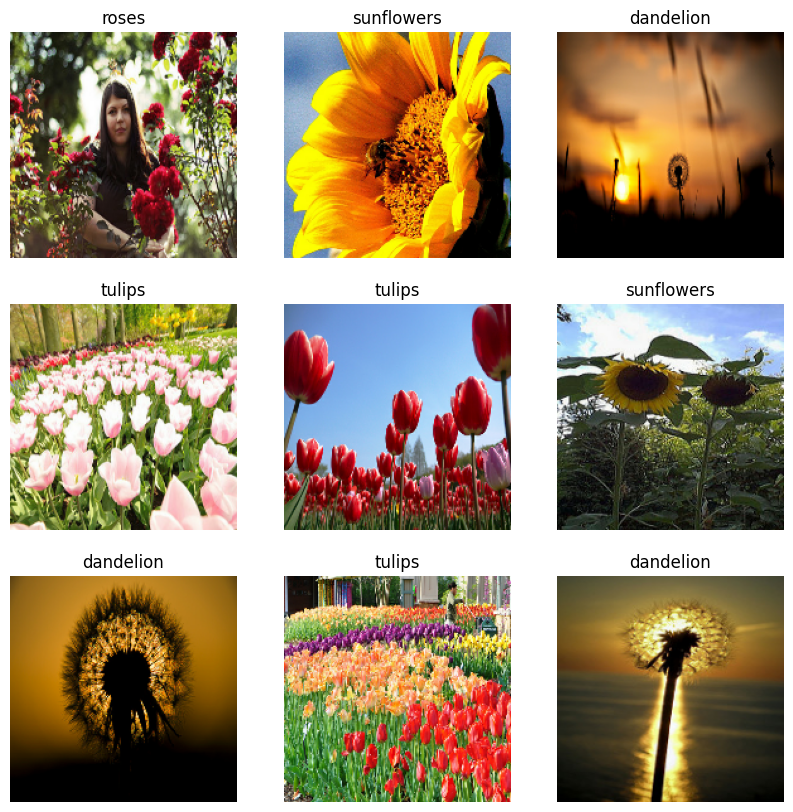

In [25]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(2):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [26]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 180, 180, 3)
(32,)


Standardize Data
The RGB channel values are in the [0, 255] range.
standardize values to be in the [0, 1] range.

In [27]:
normalization_layer = tf.keras.layers.Rescaling(1./255)

In [28]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
fifth_image = image_batch[5]
# Notice the pixel values are now in `[0,1]`.
print(np.min(fifth_image), np.max(fifth_image))

0.0 1.0


In [31]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

The Simple Sequential CNN Model

In [34]:
num_classes = 5

model = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(64, 7, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(64, 5, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_classes)
])

In [35]:
model.compile(
  optimizer='adam',
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [36]:
model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=3
)

Epoch 1/3
92/92 [==============================] - 577s 6s/step - loss: 1.3903 - accuracy: 0.3849 - val_loss: 1.1308 - val_accuracy: 0.5531
Epoch 2/3
92/92 [==============================] - 559s 6s/step - loss: 1.1196 - accuracy: 0.5436 - val_loss: 1.1301 - val_accuracy: 0.5872
Epoch 3/3
92/92 [==============================] - 555s 6s/step - loss: 1.0087 - accuracy: 0.6059 - val_loss: 1.0395 - val_accuracy: 0.5940


In [43]:
sunflower_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/592px-Red_sunflower.jpg"
sunflower_path = tf.keras.utils.get_file('Red_sunflower', origin=sunflower_url)

img = tf.keras.utils.load_img(
    sunflower_path, target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

1/1 [==============================] - 0s 136ms/step
This image most likely belongs to sunflowers with a 47.63 percent confidence.


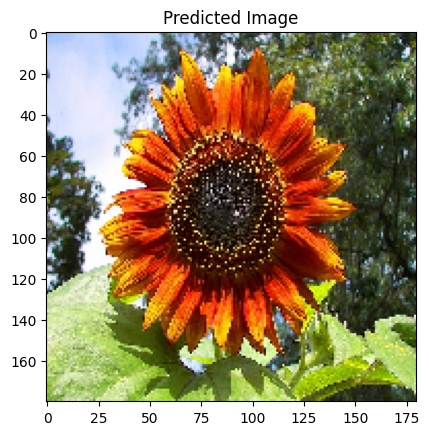

In [45]:
def display_images(predicted_image):
  """Displays the input image and predicted image side-by-side."""
  fig, ax = plt.subplots(1, 1)
  ax.imshow(predicted_image)
  ax.set_title('Predicted Image')
  plt.show()

display_images(img)
